In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

**Read and shuffle the dataset**

In [5]:
df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen from strings**

In [6]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()    

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset characteristics**

In [7]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Check for null and NaN values**

In [8]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


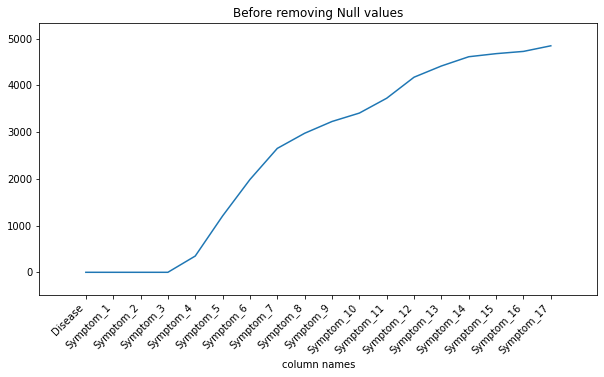

In [9]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

**Remove the trailing space from the symptom columns**

In [10]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fill the NaN values with zero**

In [11]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


**Symptom severity rank**

In [12]:
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


**Get overall list of symptoms**

In [13]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode symptoms in the data with the symptom rank**

In [14]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


**Assign symptoms with no rank to zero**

In [15]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


**Check if entire columns have zero values so we can drop those values**

In [16]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


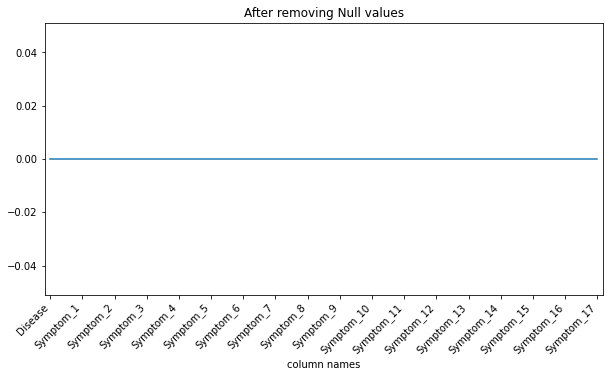

In [17]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [18]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


### Compare linear relationships between attributes using correlation coefficient

<AxesSubplot:>

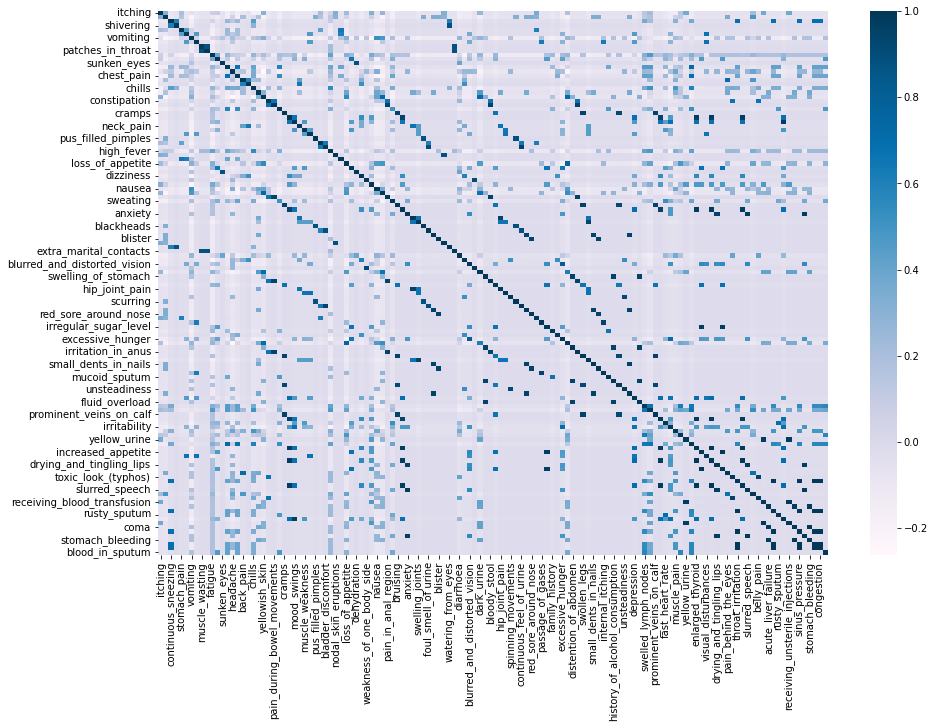

In [19]:
new_df = pd.read_csv('newdf.csv')
encoding = pd.read_csv('decryption.csv',index_col=0)
new_df.drop(labels=["132",'74','0'],axis=1,inplace=True)
renameddf=new_df.rename(errors='raise',inplace=False,columns= {str(x):y for y,x in encoding.to_dict()['code'].items()})
renameddf
plt.figure(figsize= (15,10))
sns.heatmap(renameddf.corr(),cmap="PuBu",annot=False)

# pandas report on dataset

In [20]:
# ProfileReport(df)

**Get the names of diseases from data**

In [21]:
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

### Select the features as symptoms column and label as Disease column

Explination: A **feature** is an input; **label** is an output.
A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

Once you've trained your model, you will give it sets of new input containing those features; it will return the predicted "label" (pet type) for that person.

In [22]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

## Splitting the dataset to training (80%) and testing (20%)

Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.
After a model has been processed by using the training set, we test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct.

* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)



**Initialize and train a Support vector classifier**

In [24]:
SVM_unhyperd= SVC()
SVM_unhyperd.fit(x_train, y_train)

SVC()

### Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a weighted average of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is

    F1 = 2 * (precision * recall) / (precision + recall)

In [25]:
preds = SVM_unhyperd.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100,'|', 'Precision% =', precision_score(y_test, preds,average='macro')*100)

F1-score% = 93.10485856410196 | Accuracy% = 93.4959349593496 | Precision% = 94.2446688327875


**Plot the confusion matrix for 25 diseases**

<AxesSubplot:>

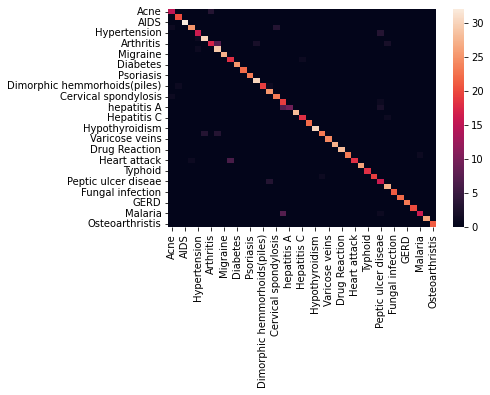

In [26]:
sns.heatmap(df_cm)

In [27]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_unhyperd_train =cross_val_score(SVM_unhyperd, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_unhyperd_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_unhyperd_train.mean()*100.0, SVM_unhyperd_train.std()*100.0))

Mean Accuracy: 92.988%, Standard Deviation: (0.85%)


In [28]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_unhyperd_test =cross_val_score(SVM_unhyperd, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_unhyperd_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_unhyperd_test.mean()*100.0, SVM_unhyperd_test.std()*100.0))

Mean Accuracy: 82.623%, Standard Deviation: (2.54%)


In [29]:
print(classification_report(y_test, preds))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.88      0.83      0.86        18
                                   AIDS       0.95      1.00      0.98        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       0.96      0.86      0.91        29
                                Allergy       0.89      0.84      0.86        19
                              Arthritis       0.91      0.97      0.94        31
                       Bronchial Asthma       0.85      0.61      0.71        28
                   Cervical spondylosis       0.74      0.97      0.84        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       0.75      0.95      0.84        19
                            Common Cold       1.00      1.00      1.00        25
                           

# Hyperparameter tuning with GridSearchCV

Performing hyperparameter tuning in order to determine the optimal values for our given model.The performance of a model significantly depends on the value of hyperparameters. There is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we used GridSearchCV to automate the tuning of hyperparameters.
**Note:** The ouput of the Gridsearchcv is **SVC(C=0.02, gamma=0.3, kernel='poly')**

In [30]:
# param_grid = {'C': [0.2,0.4,0.6], 'gamma': [0.2,0.3,0.4,0],'kernel': ['linear','poly', 'sigmoid']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(x_train,y_train)
# print(grid.best_estimator_)
# grid_predictions = grid.predict(x_test)
# print(confusion_matrix(y_test,grid_predictions))
# print(classification_report(y_test,grid_predictions))

F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<AxesSubplot:>

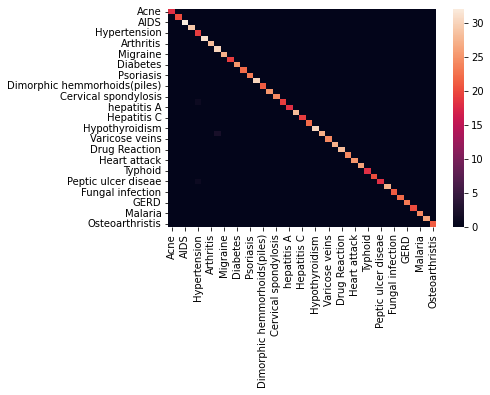

In [31]:
SVM_hyperd = SVC(C=0.02, gamma=0.3, kernel='poly')
SVM_hyperd.fit(x_train, y_train)
preds = SVM_hyperd.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

## Using 10-Fold Cross Validation to estimate the performance of machine learning models

The procedure provides an estimate of the model performance on the dataset when making a prediction on data not used during training. It is less biased than some other techniques, such as a single train-test split for small- to modestly-sized dataset

In [32]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_hyperd_train =cross_val_score(SVM_hyperd, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_hyperd_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_hyperd_train.mean()*100.0, SVM_hyperd_train.std()*100.0))

Mean Accuracy: 99.492%, Standard Deviation: (0.38%)


In [33]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_hyperd_test =cross_val_score(SVM_hyperd, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_hyperd_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_hyperd_test.mean()*100.0, SVM_hyperd_test.std()*100.0))

Mean Accuracy: 96.639%, Standard Deviation: (1.94%)


# Naive Bayes Model

F1-score% = 86.58357842139314 | Accuracy% = 87.70325203252033


<AxesSubplot:>

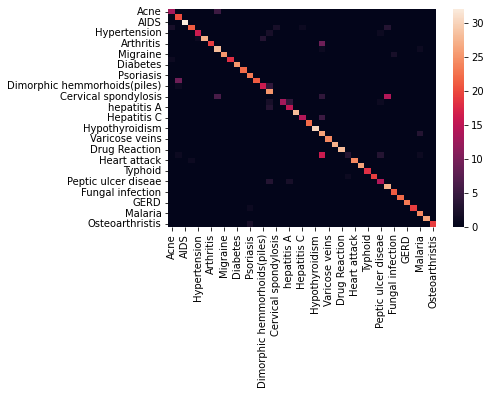

In [34]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
preds=gaussian.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [35]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_train =cross_val_score(gaussian, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_train.mean()*100.0, gaussian_train.std()*100.0))

Mean Accuracy: 86.840%, Standard Deviation: (1.65%)


In [36]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_test =cross_val_score(gaussian, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_test.mean()*100.0, gaussian_test.std()*100.0))

Mean Accuracy: 85.666%, Standard Deviation: (1.77%)


# Decision Tree

F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<AxesSubplot:>

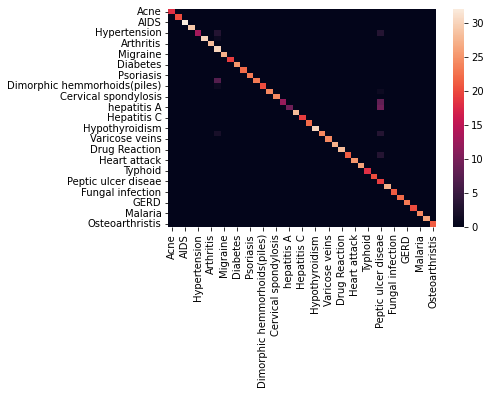

In [37]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [38]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [39]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


# Random Forest

In [40]:
rfc=RandomForestClassifier(random_state=42)

F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<AxesSubplot:>

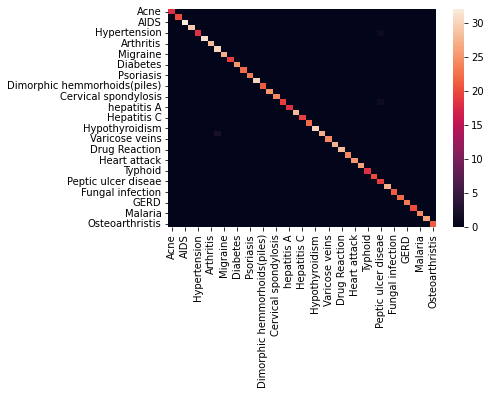

In [41]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [42]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [43]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


# Fucntion to manually test the models

In [44]:
def predd(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,x):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    psy = [psymptoms]

    pred2 = x.predict(psy)
    print("The prediction is",pred2[0])

In [45]:
sympList=df1["Symptom"].to_list()
predd(sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,rnd_forest)

['stomach pain', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [46]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[1],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_hyperd)

['acidity', 'skin rash', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Paralysis (brain hemorrhage)


In [47]:
sympList=df1["Symptom"].to_list()
predd(sympList[8],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0,SVM_unhyperd)

['acidity', 'chills', 'nodal skin eruptions', 'muscle weakness', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The prediction is Allergy


# Comparison between algorithms testing and training

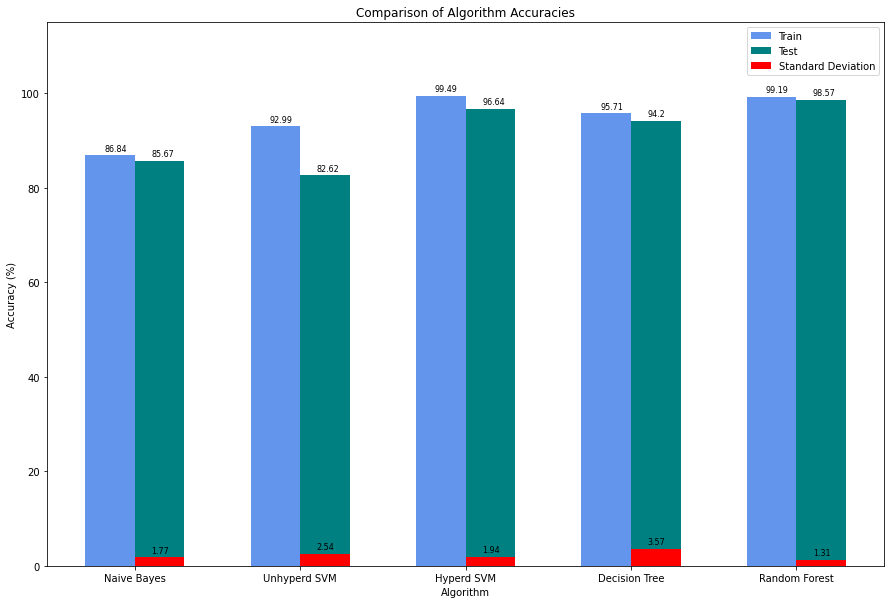

In [48]:
n_groups = 5
algorithms = ('Naive Bayes','Unhyperd SVM', 'Hyperd SVM','Decision Tree', 'Random Forest')
train_accuracy = (gaussian_train.mean()*100.0, 
                 SVM_unhyperd_train.mean()*100.0,
                 SVM_hyperd_train.mean()*100.0,
                 DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,
                 )


test_accuracy = (gaussian_test.mean()*100.0, 
                 SVM_unhyperd_test.mean()*100.0,
                 SVM_hyperd_test.mean()*100.0,
                 DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0
                )

Standard_Deviation=(gaussian_test.std()*100.0, 
                 SVM_unhyperd_test.std()*100.0,
                 SVM_hyperd_test.std()*100.0,
                 DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0
                 
                   )

# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))    